# Data cleaning

In [115]:
import pickle as pk
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline
from ast import literal_eval

from dateutil.parser import parse
import datetime

import warnings
warnings.filterwarnings("ignore")

In [116]:
def open_file(filename):
    with open(filename, 'rb') as fh:
        data = pk.load(fh)
    return data

In [117]:
def extracting_account_Data(twitteraccountResults):
    text = []
    tags = []
    hashtags = []
    likes = []
    retweets = []
    date = []
    ID =[]
    
    for tweet in twitteraccountResults: # Going through each tweet and get the information from it.
                            ##################################
        list_user_mentions = tweet["entities"]["user_mentions"] # Getting the mentions in tweet
        
        user_mentions = [] # To save the list of mentions in the tweet
        for user in list_user_mentions: user_mentions.append(list_user_mentions[0]["name"]) # Going on each mention

        tags.append(user_mentions) 
                            ##################################    
        text.append(tweet["text"])
                            ##################################    
        hashtags_list = tweet["entities"]["hashtags"] # Getting the hashtags in tweet
        hashtags_names_list = [] # To save the list of hashtags in the tweet
        
        for hasht in hashtags_list: hashtags_names_list.append(hasht["text"]) # Going on each hashtag
            
        hashtags.append(hashtags_names_list) 
                                ##################################    
        #try: likes.append(tweet["retweeted_status"]["favorite_count"]) # If there is a retweet the likes will be in the retweeted_status
        #except: likes.append(tweet["favorite_count"]) # else the real likes will be in favorite_count
        likes.append(tweet["favorite_count"])
        '''If there are no likes on the post it will check the likes on the retweet_status information'''
    
                            ##################################        
        retweets.append(tweet["retweet_count"])
                                ##################################date.append(parse(tweet["created_at"]).strftime('%Y-%m-%d::%H-%M-%S'))
        date.append(tweet["created_at"])
        ID.append(tweet["id"])
        
    return text, tags, hashtags, likes, retweets, date , ID

In [118]:
def creat_dataframe(filename):
    raw_data = open_file(filename)
    text, tags, hashtags, likes, retweets, date, ID = extracting_account_Data(raw_data)
    account_df = pd.DataFrame({"ID": ID,
                        "Date": date,
                        "Text": text,
                         "Mentions": tags,
                         "Hashtags": hashtags,
                         "Likes": likes,
                         "Retweets": retweets,
                        })
    return account_df

In [119]:
data = creat_dataframe("elonmuskdata.bin")

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3278 entries, 0 to 3277
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        3278 non-null   int64 
 1   Date      3278 non-null   object
 2   Text      3278 non-null   object
 3   Mentions  3278 non-null   object
 4   Hashtags  3278 non-null   object
 5   Likes     3278 non-null   int64 
 6   Retweets  3278 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 179.4+ KB


In [121]:
data

,ID,Date,Text,Mentions,Hashtags,Likes,Retweets
0,1362726185931857925,Fri Feb 19 11:30:15 +0000 2021,@NASA Congratulations!!,[NASA],[],96926,2822
1,1362722649777045508,Fri Feb 19 11:16:12 +0000 2021,@YourLordThanos @Waymo 🔥🔥,"[THANOS, THANOS]",[],1479,108
2,1362618106984693762,Fri Feb 19 04:20:47 +0000 2021,"@realfuckingnews @business Somehow, a hash tex...",[p₿itty aka ₿ittycent aka the Notorious BRRRRR...,[],7285,997
3,1362600676174557186,Fri Feb 19 03:11:31 +0000 2021,"@business To be clear, I am *not* an investor,...",[Bloomberg],[],32897,5968
4,1362598034866118658,Fri Feb 19 03:01:02 +0000 2021,@business Tesla’s action is not directly refle...,[Bloomberg],[],25980,3331
...,...,...,...,...,...,...,...
3273,1246710761445081088,Sun Apr 05 08:06:22 +0000 2020,@wjduncan One is Havanese &amp; one came from ...,[Jason Duncan],[],928,29
3274,1246710761445081088,Sun Apr 05 08:06:22 +0000 2020,@wjduncan One is Havanese &amp; one came from ...,[Jason Duncan],[],928,29
3275,1246710761445081088,Sun Apr 05 08:06:22 +0000 2020,@wjduncan One is Havanese &amp; one came from ...,[Jason Duncan],[],928,29
3276,1246710761445081088,Sun Apr 05 08:06:22 +0000 2020,@wjduncan One is Havanese &amp; one came from ...,[Jason Duncan],[],928,29


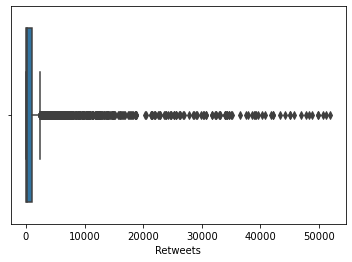

In [89]:
sns.boxplot(data.Retweets)

In [90]:
def change_outliers(df, columns):
    for col in columns:
        outliers = abs((df[col]-df[col].mean()) // df[col].std())>3
        df[col][outliers]= np.nan
    return df

In [91]:
def delete_duplicates(df, columns):
    for col in columns:
        df = df.drop_duplicates(subset =col, ignore_index=True)
    return df

In [92]:
def change_date_format(df):
    df["Date"] = df["Date"].apply(lambda date: parse(date).strftime('%Y-%m-%d::%H-%M-%S'))
    return df

In [93]:
def num_of_obj_in_list_col(df, columns):
    for col in columns:
        col_new_name = "number_of_" + col
        df[col_new_name] = df[col].apply(lambda x: len(x))
    return df

In [94]:
def delete_na(df, columns):
    df = df.dropna(subset=["Likes", "Retweets"])
    return df    

In [106]:
#Changing the data
def get_cleaned_data(df):
    #new_df = change_outliers(df, ["Likes", "Retweets"])
    #new_df = delete_na(new_df, ["Likes", "Retweets"])
    new_df = delete_duplicates(df, ["Text"])
    new_df = change_date_format(new_df)
    new_df = num_of_obj_in_list_col(new_df, ["Mentions", "Hashtags"])
    new_df["Likes"] = [int(l) for l in new_df["Likes"]]
    new_df["Retweets"] = [int(r) for r in new_df["Retweets"]]
    return new_df

In [96]:
new_data = get_cleaned_data(data)
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  3044 non-null   int64 
 1   Date                3044 non-null   object
 2   Text                3044 non-null   object
 3   Mentions            3044 non-null   object
 4   Hashtags            3044 non-null   object
 5   Likes               3044 non-null   int64 
 6   Retweets            3044 non-null   int64 
 7   number_of_Mentions  3044 non-null   int64 
 8   number_of_Hashtags  3044 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 214.2+ KB


In [97]:
new_data

,ID,Date,Text,Mentions,Hashtags,Likes,Retweets,number_of_Mentions,number_of_Hashtags
0,1362279856902438916,2021-02-18::05-56-42,@someone3201 @ERCOT_ISO Yes,"[pankaj vohra, pankaj vohra]",[],2949,148,2,0
1,1361962505573031938,2021-02-17::08-55-40,.@ERCOT_ISO is not earning that R,[ERCOT],[],110216,7857,1,0
2,1361901255472205825,2021-02-17::04-52-16,@MattWallace888 @vladtenev @RobinhoodApp You’r...,"[Matt Wallace ⚠️, Matt Wallace ⚠️, Matt Wallac...",[],11591,1516,3,0
3,1361711665864130563,2021-02-16::16-18-55,"@Tesla Covered in snow &amp; ice, roads mostly...",[Tesla],[],37885,1422,1,0
4,1361709250561642498,2021-02-16::16-09-19,@cz_binance @MansourShahrokh There will defini...,"[CZ 🔶 Binance, CZ 🔶 Binance]",[],23656,2968,2,0
...,...,...,...,...,...,...,...,...,...
3039,1248012923185725440,2020-04-08::22-20-42,@master_ov @flcnhvy @thirdrowtesla Good one,"[Ov, Ov, Ov]",[],925,29,3,0
3040,1248012453511720960,2020-04-08::22-18-50,What is simple in one arena is often profound ...,[],[],21689,1428,0,0
3041,1247999439962140672,2020-04-08::21-27-07,@aaronbrighton @teslaownersSV @flcnhvy @thirdr...,"[Aaron Brighton, Aaron Brighton, Aaron Brighto...",[],1439,35,4,0
3042,1247991689018404864,2020-04-08::20-56-19,Great differences in technology exist in the w...,[],[],77467,5837,0,0


# Visualisation

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [107]:
data = creat_dataframe("elonmuskdata.bin")
new_data = get_cleaned_data(data)
new_data

,ID,Date,Text,Mentions,Hashtags,Likes,Retweets,number_of_Mentions,number_of_Hashtags
0,1362279856902438916,2021-02-18::05-56-42,@someone3201 @ERCOT_ISO Yes,"[pankaj vohra, pankaj vohra]",[],2949,148,2,0
1,1361962505573031938,2021-02-17::08-55-40,.@ERCOT_ISO is not earning that R,[ERCOT],[],110216,7857,1,0
2,1361901255472205825,2021-02-17::04-52-16,@MattWallace888 @vladtenev @RobinhoodApp You’r...,"[Matt Wallace ⚠️, Matt Wallace ⚠️, Matt Wallac...",[],11591,1516,3,0
3,1361711665864130563,2021-02-16::16-18-55,"@Tesla Covered in snow &amp; ice, roads mostly...",[Tesla],[],37885,1422,1,0
4,1361709250561642498,2021-02-16::16-09-19,@cz_binance @MansourShahrokh There will defini...,"[CZ 🔶 Binance, CZ 🔶 Binance]",[],23656,2968,2,0
...,...,...,...,...,...,...,...,...,...
3164,1248012923185725440,2020-04-08::22-20-42,@master_ov @flcnhvy @thirdrowtesla Good one,"[Ov, Ov, Ov]",[],925,29,3,0
3165,1248012453511720960,2020-04-08::22-18-50,What is simple in one arena is often profound ...,[],[],21689,1428,0,0
3166,1247999439962140672,2020-04-08::21-27-07,@aaronbrighton @teslaownersSV @flcnhvy @thirdr...,"[Aaron Brighton, Aaron Brighton, Aaron Brighto...",[],1439,35,4,0
3167,1247991689018404864,2020-04-08::20-56-19,Great differences in technology exist in the w...,[],[],77467,5837,0,0


In [108]:
def get_highly_correlated_cols(df):
    ###
    correlations = []
    tuple_arr = []
    corr_df = df.corr()
    for i in range(0, len(df.columns)):
        for j in range(i+1,len(df.columns)):
            if (corr_df.iat[i,j]>=0.5):
                correlations.append(corr_df.iat[i,j])
                tuple_arr.append((i,j))
    return correlations, tuple_arr


In [109]:
def plot_high_correlated_scatters(df):
    correlations, tuple_arr = get_highly_correlated_cols(df)
    names_of_cols = df.columns
    fig = plt.figure(figsize=(35,8))
    
    for i in range(0, len(correlations)):
        ax = fig.add_subplot(1,5, (i+1))
        col_name = tuple_arr[i]
        ax.scatter(data[names_of_cols[col_name[0]]], data[names_of_cols[col_name[1]]])
        plt.xlabel(names_of_cols[col_name[0]])
        plt.ylabel(names_of_cols[col_name[1]])
        plt.title("corr('"+names_of_cols[col_name[0]]+"', '"+names_of_cols[col_name[1]]+"')=%4.2f" %correlations[i])


In [110]:
def line_plot(df, columns2):
    fig, axis = plt.subplots(1,1,figsize=(15,5))
    line_chart1 = plt.plot(df[columns2[0]], df[columns2[1]], color='Blue')
    plt.xlabel(columns2[0])
    plt.ylabel(columns2[1])
    return plt

In [111]:
def line_plot2(df,main_col, columns2):
    fig, axis = plt.subplots(1,1,figsize=(15,5))
    line_chart1 = plt.plot(new_data[main_col], new_data[columns2[0]], color='Blue')
    line_chart2 = plt.plot(new_data[main_col], new_data[columns2[1]], color='Red')
    plt.xlabel(main_col)
    plt.legend([columns2[0], columns2[1]], loc=3)
    return plt

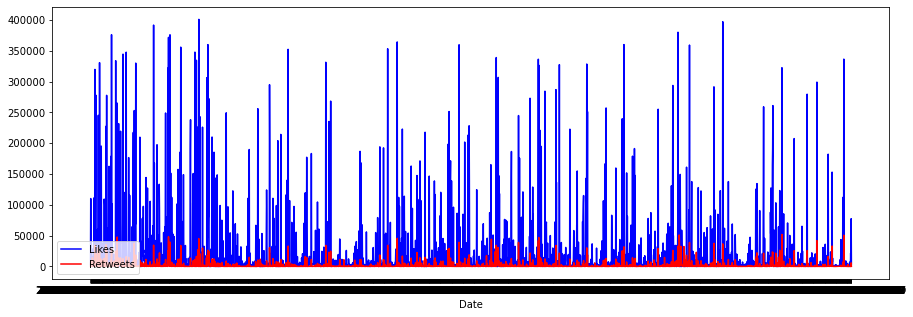

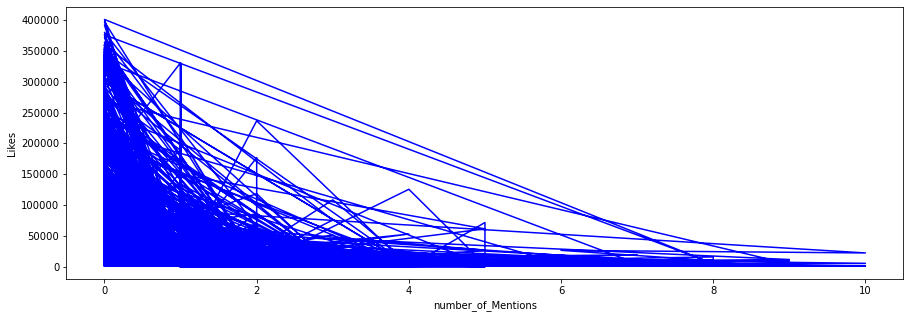

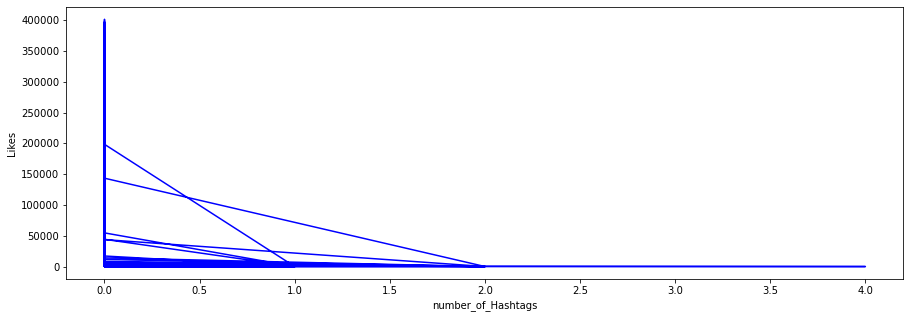

In [105]:
line_plot2(new_data, "Date", ["Likes", "Retweets"]).show()
line_plot(new_data, ["number_of_Mentions", "Likes"]).show()
line_plot(new_data, ["number_of_Hashtags", "Likes"]).show()